# 分而治之

假设你是农场主，有一小块土地。

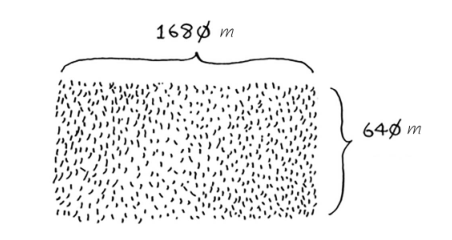

你要将这块地均匀地分成方块，且分出的方块要尽可能大。显然，下面的分法都不符合要求。

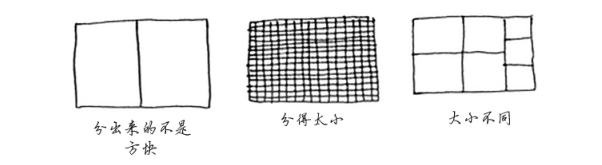

使用D&C策略：
1. 找出基线条件，这种条件必须尽可能简单
2. 不断将问题分解（或者说缩小规模），直到符合基线条件

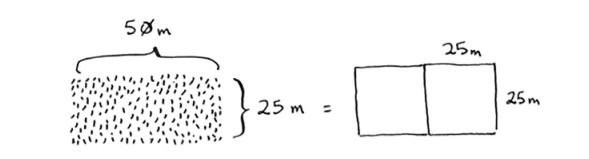

如果一边长25 m，另一边长50 m，那么可使用的最大方块为 25 m×25 m。

现在需要找出递归条件。每次递归调用都必须缩小问题的规模。

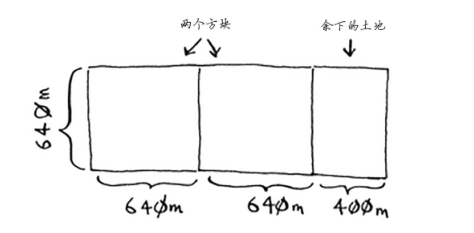

你可以从这块地中划出两个640 m×640 m的方块，同时余下一小块地。

现在是顿悟时刻：何不对余下的那一小块地使用相同的算法呢？

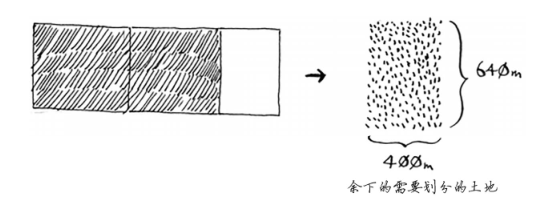

最初要划分的土地尺寸为1680 m×640 m，而现在要划分的土地更小，为640 m×400 m。适用于这小块地的最大方块，也是适用于整块地的最大方块。换言之，你将均匀划分1680 m×640 m土地的问题，简化成了均匀划分640 m×400 m土地的问题！

我们重新申明一下D&C的工作原理：

1. 找出简单的基线条件
2. 确定如何缩小问题的规模，使其符合基线条件

我们可以看一下这个数组：

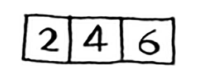

如果我们需要将这些数字相加，我们可以使用循环来完成：

In [2]:
# 定义一个函数
def sum(arr):
    total = 0
    for x in arr:
        total += x
    return total

# 打印返回的结果
print(sum([1, 2, 3, 4]))

10


但是我们该如何使用递归来完成这个任务呢？

第一步：找出基线条件。
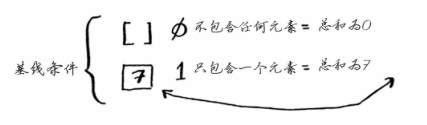

第二步：每次递归调用都必须离空数组更近一步。

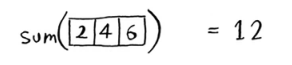

与

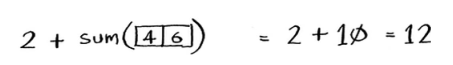

这两者是等效的。

这两个版本的结果都为12，但在第二个版本中，给函数sum传递的数组更短。换言之，这缩
小了问题的规模！

此时，函数sum的工作原理类似于下图：
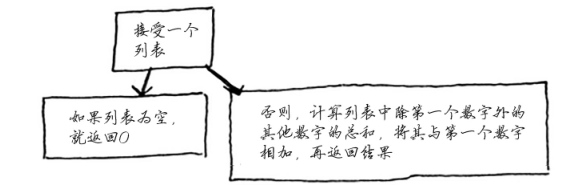

这个函数的运行过程如下：
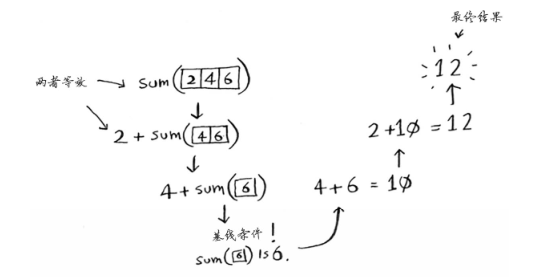

别忘了，递归记录了状态：
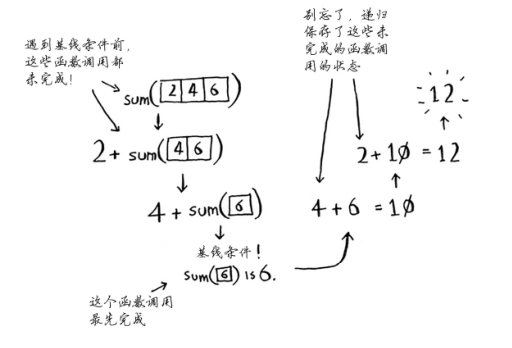

# 快速排序

如果是空数组，或者只包含一个元素，那么我们可以直接返回数组

```
def quicksort(array):
    if len(array) < 2:
        return array
```

我们来考虑一下三个元素的情况：

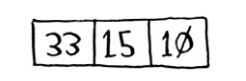

在这里，我们将33作为基准值：

接下来，找出比基准值小的元素以及比基准值大的元素。

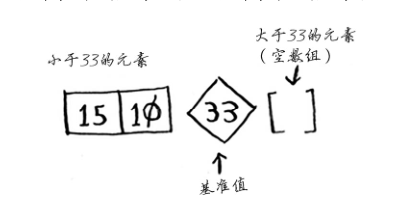

这被称为分区（partitioning）。

这里只是进行了分区，得到的两个子数组是无序的。但如果这两个数组是有序的，对整个数
组进行排序将非常容易。

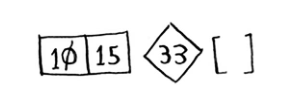

如果子数组是有序的，就可以像下面这样合并得到一个有序的数组：左边的数组 + 基准值 +
右边的数组。在这里，就是[10, 15] + [33] + []，结果为有序数组[10, 15, 33]。

对于包含两个元素的数组（左边的子数组）以及空数组（右边的子数组），快速排序知道如何将它们排序，因此只要对这两个子数组进行快速排序，再合并结果，就能得到一个有序数组！

```
print(quicksort([15, 10]) + [33] + quicksort([]))
```

结果为：[10, 15, 33]

不管将哪个元素用作基准值，这都管用。

In [7]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]  # 基准条件，为空，或者只包含一个元素的数组是有序的
        less = [i for i in array[1:] if i<= pivot] # 有所有小于基准值的元素组成的子数组
        greater = [i for i in array[1:] if i > pivot]  # 由所有大于基准值的元素组成的子数组
        
        return quicksort(less) + [pivot] + quicksort(greater)

print(quicksort([10, 15, 11, 23]))

[10, 11, 15, 23]


# 大O表示法

以下是常见的大O运行时间：

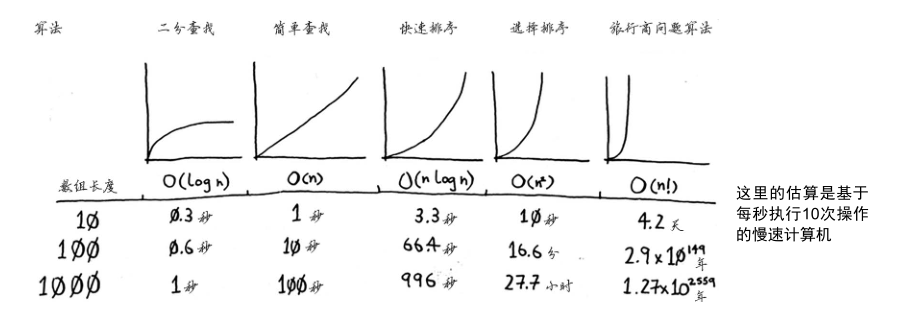

快速排序的独特之处在于，其速度取决于选择的基准值。快速排序的情况比较棘手，在最糟情况下，其运行时间为O(n^2)。

但这是最糟情况。在平均情况下，快速排序的运行时间为O(n log n)。